In [12]:
# https://www.foxsports.com.au/score-centre/rugby/super-rugby/season-2018!122/round-week-1!2
import numpy as np
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from pyquery import PyQuery as pq

data_frame = pd.DataFrame()

options = Options()
driver = webdriver.Chrome(options=options)
headers = {'User-Agent':'Mozilla/5.0'}

#for index, link in enumerate(links):
#    link = link.replace('\n','')
#    url = 'http://en.espn.co.uk/' + link



#link = "https://www.foxsports.com.au/rugby/super-rugby/match-centre/match-recap?matchid=SRU20182201"
path = "./input/match_links.txt"

with open(path) as f:
    links = f.readlines()
    
for index, link in enumerate(links):
    url = 'https:' + link
    driver.get(url)
    # HTMLを文字コードをUTF-8に変換してから取得します。
    html = driver.page_source.encode('utf-8')
    query = pq(html, parser='html')

    stats = {}
    stats['Home_Name'] = query.find('span.fscsw-home-team-name').text()
    stats['Away_Name'] = query.find('span.fscsw-away-team-name').text()
    stats['Home_Score'] = query('td.fscsw-home-team-score').eq(0).text()
    stats['Away_Score'] = query('td.fscsw-away-team-score').eq(0).text()
    stats['Home_Possesion'] = query.find('span.fscsw-stat-value-1').text()
    stats['Away_Possesion'] = query.find('span.fscsw-stat-value-0').text()
    stats['Home_Territory'] = query.find('td.fscsw-graph-xbartow-home-num').text()
    stats['Away_Territory'] = query.find('td.fscsw-graph-xbartow-away-num').text()

    stats_numbers = []
    stats_numbers.append('Runs')
    stats_numbers.append('RunMetres')
    stats_numbers.append('LineBreaks')
    stats_numbers.append('OffLoads')
    stats_numbers.append('PhaseSevenPlus')
    stats_numbers.append('Kicks')
    stats_numbers.append('KickMetres')
    stats_numbers.append('Tackles')
    stats_numbers.append('MissedTackes')
    stats_numbers.append('HandlingErrors')
    stats_numbers.append('PenaltiesConceded')
    stats_numbers.append('FreeKicksConceded')
    stats_numbers.append('SinBins')
    stats_numbers.append('SendOffs')
    stats_numbers.append('ScrumsWon')
    stats_numbers.append('LineOutsWon')
    stats_numbers.append('LineOutsWonAgainstThrow')
    stats_numbers.append('LineOutsNotStraight')

    for index, stats_name in enumerate(stats_numbers):
        stats['Home_' + stats_name] = query('td.fscsw-home-team.fscsw-number-text').eq(index).text()
        stats['Away_' + stats_name] = query('td.fscsw-away-team.fscsw-number-text').eq(index).text()

    stats['Url'] = link

    values = []
    for v in stats.values():
        values.append(v)


    series = pd.Series(values, index=stats.keys())
    data_frame = data_frame.append(series, ignore_index = True)


data_frame.to_csv( './input/match_stats.csv' )

# ブラウザを終了する。
driver.close()

data_frame.head()

,Away_FreeKicksConceded,Away_HandlingErrors,Away_KickMetres,Away_Kicks,Away_LineBreaks,Away_LineOutsNotStraight,Away_LineOutsWon,Away_LineOutsWonAgainstThrow,Away_MissedTackes,Away_Name,...,Home_Possesion,Home_RunMetres,Home_Runs,Home_Score,Home_ScrumsWon,Home_SendOffs,Home_SinBins,Home_Tackles,Home_Territory,Url
0,2,7,960,26,0,1,6,0,21,Hurricanes,...,0%,580,91,20,8,0,1,90,0%,//www.foxsports.com.au/rugby/super-rugby/match...
1,2,11,947,31,5,0,17,0,15,Brumbies,...,0%,387,66,15,4,0,0,123,0%,//www.foxsports.com.au/rugby/super-rugby/match...
2,2,6,1032,29,5,0,7,0,32,Bulls,...,0%,656,80,34,3,0,0,78,0%,//www.foxsports.com.au/rugby/super-rugby/match...
3,1,9,591,22,5,0,8,0,22,Highlanders,...,0%,546,91,32,9,0,0,82,0%,//www.foxsports.com.au/rugby/super-rugby/match...
4,0,7,884,25,4,0,16,0,36,Waratahs,...,0%,692,98,28,5,0,0,121,0%,//www.foxsports.com.au/rugby/super-rugby/match...


In [13]:
data_frame.describe()

,Away_FreeKicksConceded,Away_HandlingErrors,Away_KickMetres,Away_Kicks,Away_LineBreaks,Away_LineOutsNotStraight,Away_LineOutsWon,Away_LineOutsWonAgainstThrow,Away_MissedTackes,Away_Name,...,Home_Possesion,Home_RunMetres,Home_Runs,Home_Score,Home_ScrumsWon,Home_SendOffs,Home_SinBins,Home_Tackles,Home_Territory,Url
count,1075,1075,1075,1075,1075,1075,1075,1075,1075,1075,...,1075,1075,1075,1075,1075,1075,1075,1075,1075,1075
unique,7,24,592,43,19,6,25,11,52,37,...,50,506,114,70,16,4,5,157,53,1075
top,0,9,,,4,0,11,0,,,...,,,,,5,0,0,,0%,//www.foxsports.com.au/rugby/super-rugby/match...
freq,487,116,96,96,146,712,131,294,96,87,...,94,96,96,87,152,962,712,96,94,1


In [15]:
data_frame.columns

Index(['Away_FreeKicksConceded', 'Away_HandlingErrors', 'Away_KickMetres',
       'Away_Kicks', 'Away_LineBreaks', 'Away_LineOutsNotStraight',
       'Away_LineOutsWon', 'Away_LineOutsWonAgainstThrow', 'Away_MissedTackes',
       'Away_Name', 'Away_OffLoads', 'Away_PenaltiesConceded',
       'Away_PhaseSevenPlus', 'Away_Possesion', 'Away_RunMetres', 'Away_Runs',
       'Away_Score', 'Away_ScrumsWon', 'Away_SendOffs', 'Away_SinBins',
       'Away_Tackles', 'Away_Territory', 'Home_FreeKicksConceded',
       'Home_HandlingErrors', 'Home_KickMetres', 'Home_Kicks',
       'Home_LineBreaks', 'Home_LineOutsNotStraight', 'Home_LineOutsWon',
       'Home_LineOutsWonAgainstThrow', 'Home_MissedTackes', 'Home_Name',
       'Home_OffLoads', 'Home_PenaltiesConceded', 'Home_PhaseSevenPlus',
       'Home_Possesion', 'Home_RunMetres', 'Home_Runs', 'Home_Score',
       'Home_ScrumsWon', 'Home_SendOffs', 'Home_SinBins', 'Home_Tackles',
       'Home_Territory', 'Url'],
      dtype='object')

In [16]:
data_frame['isWin'] = data_frame['Home_Score'] > data_frame['Away_Score']

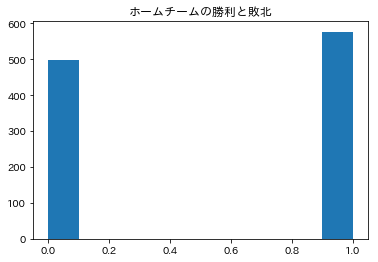

ホームチームの勝率 0.5936213991769548


In [25]:
import matplotlib.pyplot as plt
plt.hist(data_frame['isWin'])
plt.title('ホームチームの勝利と敗北')
plt.show()
print("ホームチームの勝率" , len(data_frame.query('isWin == True')) / len(data_frame.query('Home_Score != Away_Score')))